When I first heard about data science, I did not really sure where should I start and what the path is to become a Data Scientist. After countless hours of research my conclusion about what the job consists of was unclear. What I had discovered in my research was how this job title is rapidly growing into a demanding career option. Living in a time of enormous amounts of data, more and more companies are in demand and looking to fill this position. I began to question, how do you become a data scientist, what degree or level of education do you need, what skills are employers looking for? This lead me to explore the job applications, backgrounds, experiences, and skills that the current data scientist possess. So the data analysis begins!
first, I scrape LinkedIn job and I supposed with this I would gather job descriptions and key skills demanding. Second I am going to scrape individuals who land the job as a Data Scientist.
For the first part I will go with getting insights from job descriptions. Let ‘s start scraping!


In [1]:
# selenium
from selenium.webdriver.common.by import By
import selenium.webdriver as webdriver
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.keys import Keys

#sys libraries
from time import sleep
import requests
import random
import csv
import io
import os
import sys
import types
import getpass
import string
import re
from bs4 import BeautifulSoup

# Import data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# nltk and wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows' , 100)

### The Web-scrape:
I had to decide on what country and job title to pull job information from. I decided to go with United Kingdom due to the enormous amounts of applications for data scientists and the English language standard libraries for analyzing text data. 

>First, I do not condone scraping LinkedIn data in any way. Anyone who wishes to do so should first read <a href = 'https://www.linkedin.com/help/linkedin/answer/56347/prohibition-of-scraping-software?lang=enprohibition'>  LinkedIn's statement </a> on their of scraping software. 

>Also, note that LinkedIn actively suspends accounts due to <b>excessive activity</b> on a given account.

This code is to be used for learning purposes only and should not be used a tool for any commercial purpose. 

I used selenium and beautiful soup to web-scrape job application in United Kingdom in LinkedIn. 
When searching through the list of job application on LinkedIn, it will show a number of pages with 25 job applications on each page. After your first page, to continue scraping on to the next set of 25 job applications you have to get to the next page. Using selenium helped me maneuver around this issue. Selenium has a restriction on its speed because the scraping with the browser is much slower. Due to the slowness, to not get banned by LinkedIn the use of the "sleep" statements had to be used in my code multiple times to cause further slow-down. I write every job applicant to a csv file.





#### linkedin account config

In [ ]:
# getting from user input
try:
    username = input('Enter your Username ')
    password = getpass.getpass('Enter your password ')
    desired_job = input('Searched job query: ')
    desired_location = input('Location: ')
except Exception as error: 
    print('ERROR', error) 

csv_file = str.strip(desired_job)
file_name = csv_file + "_" + str(desired_location) +'.csv'

#### Scraping Linkedin jobs and save in a CSV file

In [ ]:
driver = webdriver.Firefox(executable_path= "geckodriver.exe")

profile = webdriver.FirefoxProfile()
profile.set_preference("browser.cache.disk.enable", False)
profile.set_preference("browser.cache.memory.enable", False)
profile.set_preference("browser.cache.offline.enable", False)
profile.set_preference("network.http.use-cache", False)
profile.update_preferences()

driver.get(url='https://www.linkedin.com/')
sleep(1)

# Find the sign in botthon
sign_in = driver.find_element(by='link text', value='Sign in')
sign_in.click()
sleep(3)

# We find the input section and enter our user information.
email_entry = driver.find_element(by='css selector', value='#username')
password_entry = driver.find_element(by='css selector', value='#password')

# For every letter in our email, we will set a random time between keystrokes
for letter in username:
    sleep(random.uniform(.1, .4))
    email_entry.send_keys(letter)

# We expect a random time between 0.1 and 0.4 sec for each letter of our password.
for letter in password:
    sleep(random.uniform(.1, .4))
    password_entry.send_keys(letter)

# We press enter
password_entry.send_keys(Keys.RETURN)
sleep(5)

# Go to job section
search_bar = driver.find_element_by_id('jobs-tab-icon')
search_bar.click()
sleep(.5)

# Click on search box
job_search_bar = driver.find_element_by_class_name("jobs-search-box__text-input")
job_search_bar.click()
sleep(3)

# Enter the job search term and press enter
for letter in desired_job:
    sleep(random.uniform(.1, .4))
    job_search_bar.send_keys(letter)

job_search_bar.send_keys(Keys.RETURN)
sleep(3)


source = requests.get(driver.current_url).text
soup = BeautifulSoup(source, 'lxml')

i = 0
j = 0

# open the csv file to wirte
writer = csv.writer(open(file_name, 'w', encoding='utf-8'))
#write the headers
writer.writerow(['company', 'job_title', 'job_description', 'employement_type ', 'industry', 'location', 'job_function',
                 'experience_Level' , 'num_app' , 'job_link'])

while (j < 100):

    present_url = 'https://www.linkedin.com/jobs/search/?keywords=' + desired_job + '&location=' + desired_location + '&start=' + str(i)

    driver.get(present_url)
    scroll = driver.find_element_by_class_name('jobs-search-results')
    scroll.send_keys(Keys.PAGE_DOWN)

    sleep(1)

    scroll.send_keys(Keys.PAGE_DOWN)

    sleep(1)

    scroll.send_keys(Keys.PAGE_DOWN)

    sleep(1)

    scroll.send_keys(Keys.PAGE_DOWN)

    sleep(1)

    scroll.send_keys(Keys.PAGE_DOWN)

    sleep(1)

    scroll.send_keys(Keys.PAGE_DOWN)

    sleep(1)

    scroll.send_keys(Keys.PAGE_DOWN)

    sleep(1)


    jobs = driver.find_elements_by_class_name('job-card-search__title')

    for job in jobs:
        current_url = driver.current_url
        # Locate the anchor nodes first and load all the elements into some list
        lists = driver.find_elements_by_class_name('job-card-search__link-wrapper')
        # Empty list for storing links
        links = set()
        for lis in lists:
#             print(lis.get_attribute('href'))
            # Fetch and store the links
            links.add(lis.get_attribute('href'))
            
            # Loop through all the links and launch one by one
        for link in links:
            try:
                driver.get(link)
            except:
                pass
            
            
            # -------------Scrap here----------------
            
            print('---------------------------')
            print(link)
            ''' conpany _ title'''
            try:
                company_name = driver.find_element_by_class_name("jobs-top-card__company-url")
                if company_name == '' :
                    company_name = driver.find_element_by_class_name('jobs-top-card__company-info')
                company_name = company_name.text
                if company_name:
                    company_name = company_name.strip()
            except:
                company_name = np.nan
                
            print(company_name , '\n')
            sleep(0.5)
            
            ''' job _ title'''
            try:
                job_name = driver.find_element_by_class_name("jobs-top-card__job-title")
                job_name = job_name.text
                if job_name:
                    job_name = job_name.strip()
            except:
                job_name = np.nan
            
            print(job_name, '\n')
            sleep(0.5)
            
            ''' job _ description'''
            try:
                job_description = driver.find_element_by_class_name('jobs-description-content__text')
                if job_description == '':
                    job_description = driver.find_element_by_class_name('jobs-box__html-content')
                elif job_description == '' :
                    job_description = driver.find_element_by_id('job-details')
                job_description = job_description.text
                if job_description:
                    job_description = job_description.strip()
            except:
                    job_description = np.nan
                    
            print(job_description, '\n')
            sleep(0.5)
                    
            ''' employement _ type'''
            try:
                employement_type = driver.find_element_by_class_name("js-formatted-employment-status-body")
                employement_type = employement_type.text
                
                if employement_type:
                    employement_type = employement_type.strip()
            except:
                employement_type = np.nan
                
            print(employement_type, '\n')
            sleep(0.5)
            
            ''' industry'''
            try:
                industry = driver.find_element_by_class_name('js-formatted-industries-list')
                if industry == '' :
                    industry = driver.find_element_by_class_name("jobs-description-details__list")
                industry = industry.find_elements_by_class_name('jobs-box__list-item')
                industry = [ind.text for ind in industry]
                industry = ','.join(industry)
                
                if industry:
                    industry = industry.strip()
            except:
                industry = np.nan
                
            print(industry, '\n')
            sleep(0.5)
            
            ''' location'''
            try:
                location = driver.find_element_by_class_name("jobs-commute-module__company-location")
                if location == '':
                    location = driver.find_element_by_class_name("jobs-top-card__exact-location")
                location = location.text
                if location:
                    location = location.strip()
            except:
                location = np.nan
            
            print(location , '\n')
            sleep(0.5)
                
            ''' job_function'''
            try:
                job_function = driver.find_element_by_class_name("jobs-description-details__list-item")
                job_function = job_function.text
                if job_function:
                    job_function = job_function.strip()
            except:
                job_function = np.nan
                
            print(job_function , '\n')
            sleep(0.5)
                
            ''' experience_Level'''
            try:
                experience_Level = driver.find_element_by_class_name("js-formatted-exp-body")
                experience_Level = experience_Level.text
                if experience_Level:
                    experience_Level = experience_Level.strip()
            except:
                experience_Level = np.nan
                
            print(experience_Level , '\n')
            sleep(0.5)
                
            ''' num_app'''
            try:
                num_app = driver.find_element_by_class_name('ml1')
                if num_app == '':
                    num_app =driver.find_element_by_class_name('mt1')
                num_app = num_app.text
                
                if num_app:
                    num_app = num_app.strip()
            except:
                num_app = np.nan
                
            print(num_app , '\n')
            sleep(0.5)
            
            
            writer.writerow([company_name, job_name, job_description, employement_type, industry, location,
                         job_function, experience_Level , num_app , current_url])
            
            sleep(2)

    i = i + 25

    j = j + 1

print("The process is completed .../n closing The program!")
driver.quit()


## Exploratory Data Analysis (EDA)

In [2]:
# Reading from scv file
df = pd.read_csv('data scientist_United Kingdom.csv',index_col=False)
df

company              job_title  \
0                  Salt         Data Scientist   
1             KBR, Inc.         Data Scientist   
2                   THG  Junior Data Scientist   
3    Kleboe Jardine Ltd         Data Scientist   
4        Forsyth Barnes         Data Scientist   
..                  ...                    ...   
770                 NaN                    NaN   
771                 NaN                    NaN   
772                 NaN                    NaN   
773                 NaN                    NaN   
774                 NaN                    NaN   

                                                                                         job_description  \
0    Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1    Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2    Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3    My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4    I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   
..                                                                                                   ...   
770                                                                                                  NaN   
771                                                                                                  NaN   
772                                                                                                  NaN   
773                                                                                                  NaN   
774                                                                                                  NaN   

    employement_type   \
0                 NaN   
1                 NaN   
2                 NaN   
3                 NaN   
4           Full-time   
..                ...   
770               NaN   
771               NaN   
772               NaN   
773               NaN   
774               NaN   

                                                             industry  \
0                                                                 NaN   
1                                                                 NaN   
2                                                                 NaN   
3                                                                 NaN   
4    Marketing & Advertising,Staffing & Recruiting,Financial Services   
..                                                                ...   
770                                                               NaN   
771                                                               NaN   
772                                                               NaN   
773                                                               NaN   
774                                                               NaN   

    location             job_function experience_Level         num_app  skill  \
0        NaN                      NaN              NaN             NaN    NaN   
1        NaN                      NaN              NaN  131 applicants    NaN   
2        NaN                      NaN              NaN             NaN    NaN   
3        NaN                      NaN              NaN  129 applicants    NaN   
4        NaN  Marketing & Advertising      Entry level             NaN    NaN   
..       ...                      ...              ...             ...    ...   
770      NaN                      NaN              NaN             NaN    NaN   
771      NaN                      NaN              NaN             NaN    NaN   
772      NaN                      NaN              NaN             NaN    NaN   
773      NaN                      NaN              NaN             NaN    NaN   
774      NaN                      NaN            

In [3]:
# find number of missing data based on each column
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("\n")

company
False    715
True      60
Name: company, dtype: int64


job_title
False    717
True      58
Name: job_title, dtype: int64


job_description
False    716
True      59
Name: job_description, dtype: int64


employement_type 
True     401
False    374
Name: employement_type , dtype: int64


industry
False    566
True     209
Name: industry, dtype: int64


location
True     736
False     39
Name: location, dtype: int64


job_function
False    521
True     254
Name: job_function, dtype: int64


experience_Level
False    479
True     296
Name: experience_Level, dtype: int64


num_app
True     495
False    280
Name: num_app, dtype: int64


skill
True    775
Name: skill, dtype: int64


job_link
False    775
Name: job_link, dtype: int64




### Do some cleaning and exploring on data
as you can see we have 775 rows × 11 columns. There some rows with null values. Because when we use selenium and getting elements with their class and atributes it has a chance that you got nothing!
We want to explore job applications description so let 's filter data by description

In [4]:
jobs=df[df['job_description'].notnull()]
jobs

company                       job_title  \
0                       Salt                  Data Scientist   
1                  KBR, Inc.                  Data Scientist   
2                        THG           Junior Data Scientist   
3         Kleboe Jardine Ltd                  Data Scientist   
4             Forsyth Barnes                  Data Scientist   
..                       ...                             ...   
745                     Sage  Data Engineer / Data Scientist   
746     MBR Partners Limited       Data Scientist - Contract   
747  Nichols Digital Limited                    Data Analyst   
748             Anchor Trust                    Data Analyst   
749            Myles Roberts                    Data Analyst   

                                                                                         job_description  \
0    Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1    Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2    Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3    My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4    I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   
..                                                                                                   ...   
745  Advert Sage is a global company with a local heart. The market leader for cloud-based accounting...   
746  The Role\r\n\r\nData Scientist (Contract/Full time)\r\n\r\nWho We Are Looking For People\r\nStro...   
747  Data Analyst, Quality Control, Data Analytics, Excel, either PHP/ Java/\r\nSQL/ MATLAB/ Yellowfi...   
748  Job Title: Data Analyst\r\n\r\nLocation: Bradford or Chippenham\r\n\r\nSalary: Competitive depen...   
749  Data analyst required for a 6 month contract (12+ months project) based in the Central London (w...   

    employement_type   \
0                 NaN   
1                 NaN   
2                 NaN   
3                 NaN   
4           Full-time   
..                ...   
745         Full-time   
746               NaN   
747         Full-time   
748               NaN   
749               NaN   

                                                                            industry  \
0                                                                                NaN   
1                                                                                NaN   
2                                                                                NaN   
3                                                                                NaN   
4                   Marketing & Advertising,Staffing & Recruiting,Financial Services   
..                                                                               ...   
745                     Information Technology & Services,Computer Software,Internet   
746           Computer Software,Telecommunications,Information Technology & Services   
747           Information Technology & Services,Computer Software,Financial Services   
748  Non-profit Organization Management,Staffing & Recruiting,Hospital & Health Care   
749        Information Technology & Services,Computer Software,Staffing & Recruiting   

                                             location  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
745                                               NaN   
746                                               NaN   
747                                               NaN   
748  2 Godwin Street, Bradf

In [5]:
jobs.columns

Index(['company', 'job_title', 'job_description', 'employement_type ',
       'industry', 'location', 'job_function', 'experience_Level', 'num_app',
       'skill', 'job_link'],
      dtype='object')

In [7]:
# let 's drop skills and location columns
# because all the rows in skills are null and we scrape United Kingdom so we don't need location anymore!
del jobs['skill']
del jobs['location']

In [8]:
jobs.dtypes

company              object
job_title            object
job_description      object
employement_type     object
industry             object
job_function         object
experience_Level     object
num_app              object
job_link             object
dtype: object

In [9]:
jobs.head()

company              job_title  \
0                Salt         Data Scientist   
1           KBR, Inc.         Data Scientist   
2                 THG  Junior Data Scientist   
3  Kleboe Jardine Ltd         Data Scientist   
4      Forsyth Barnes         Data Scientist   

                                                                                       job_description  \
0  Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1  Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2  Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   

  employement_type   \
0               NaN   
1               NaN   
2               NaN   
3               NaN   
4         Full-time   

                                                           industry  \
0                                                               NaN   
1                                                               NaN   
2                                                               NaN   
3                                                               NaN   
4  Marketing & Advertising,Staffing & Recruiting,Financial Services   

              job_function experience_Level         num_app  \
0                      NaN              NaN             NaN   
1                      NaN              NaN  131 applicants   
2                      NaN              NaN             NaN   
3                      NaN              NaN  129 applicants   
4  Marketing & Advertising      Entry level             NaN   

                                                                                            job_link  
0  https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location=United%20Kingdom&start=0  
1  https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location=United%20Kingdom&start=0  
2  https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location=United%20Kingdom&start=0  
3  https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location=United%20Kingdom&start=0  
4  https://www.linkedin.com/jobs/search/?keywords=data%20scientist&location=United%20Kingdom&start=0

In [37]:
#let 's see which company has the most applications for data science in united kingdom!
jobs['company'].value_counts().to_frame().reset_index()

index  company
0                        Signifyd        3
1                      Mastercard        3
2                        Burberry        3
3                         Harnham        3
4                        Quotacom        2
..                            ...      ...
607                           AXS        1
608                Liberty Global        1
609                        Adecco        1
610    Opus Recruitment Solutions        1
611  @UKPLC Company Registrations        1

[612 rows x 2 columns]

In [36]:
#let 's see what are the most title used for data science jobs in united kingdom!
print(len(jobs['job_title'].unique()) , ' Unique Title')
jobs['job_title'].value_counts().to_frame().reset_index()


188  Unique Title


index  \
0                                                             Data Scientist   
1                                                               Data Analyst   
2                                                      Senior Data Scientist   
3                                                        Lead Data Scientist   
4                                                      Junior Data Scientist   
..                                                                       ...   
183                                                      Data Analyst (MADE)   
184                                     Graduate Data Analyst Media Industry   
185  Data Scientist - App Store, Apple Music, Apple TV and related products.   
186                                              Graduate Research Scientist   
187                                                Data Scientist, Economist   

     job_title  
0          235  
1          175  
2           40  
3           17  
4           16  
..         ...  
183          1  
184          1  
185          1  
186          1  
187          1  

[188 rows x 2 columns]

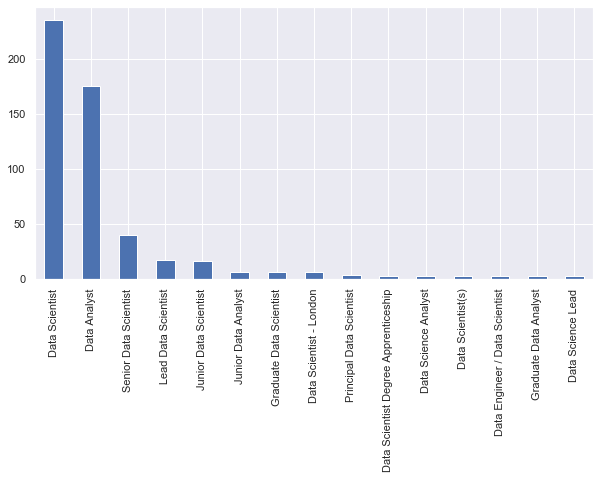

In [34]:
plt.figure(figsize=(10,5))
plt.tight_layout()

jobs['job_title'].value_counts().nlargest(15).plot(kind='bar')


In [39]:
employement = jobs[jobs['employement_type '].notnull()]

employement['employement_type '].value_counts().to_frame()


employement_type 
Full-time                 354
Part-time                   7
Temporary                   5
Contract                    5
Internship                  2

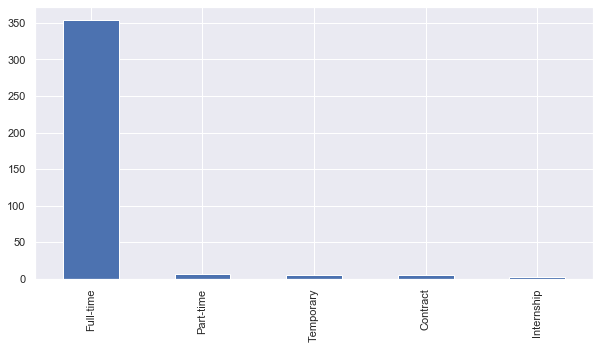

In [40]:
plt.figure(figsize=(10,5))
plt.tight_layout()
employement['employement_type '].value_counts().nlargest(15).plot(kind='bar')


In [42]:
experience_Level = employement = jobs[jobs['experience_Level'].notnull()]

employement['experience_Level'].value_counts().to_frame()

experience_Level
Entry level                    400
Associate                       37
Mid-Senior level                29
Internship                      11
Executive                        1

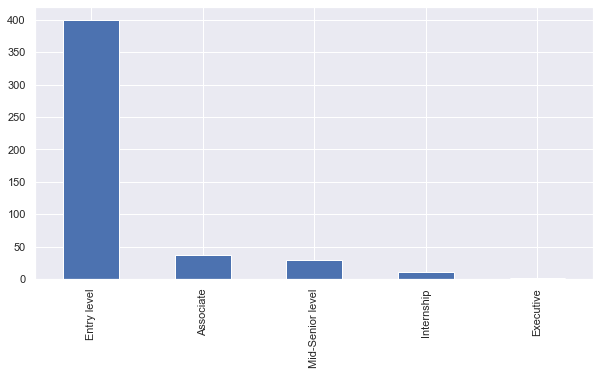

In [43]:
plt.figure(figsize=(10,5))
plt.tight_layout()
employement['experience_Level'].value_counts().nlargest(15).plot(kind='bar')


In [44]:
discription_df = jobs[['job_description']].copy()
discription_df

job_description
0    Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...
1    Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...
2    Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...
3    My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...
4    I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...
..                                                                                                   ...
745  Advert Sage is a global company with a local heart. The market leader for cloud-based accounting...
746  The Role\r\n\r\nData Scientist (Contract/Full time)\r\n\r\nWho We Are Looking For People\r\nStro...
747  Data Analyst, Quality Control, Data Analytics, Excel, either PHP/ Java/\r\nSQL/ MATLAB/ Yellowfi...
748  Job Title: Data Analyst\r\n\r\nLocation: Bradford or Chippenham\r\n\r\nSalary: Competitive depen...
749  Data analyst required for a 6 month contract (12+ months project) based in the Central London (w...

[716 rows x 1 columns]

In [45]:
discription_df.isna().sum()

job_description    0
dtype: int64

In [46]:
rand_indexs = np.random.randint(1,len(discription_df),50).tolist()
discription_df["job_description"][rand_indexs]

C:\Users\behdad\Anaconda3\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


89     About The Role\r\n\r\nWould you like to work for one of the leading players in the international...
285    As a senior data scientist within the exciting, new claims advanced\r\nanalytics capability, you...
49     Overview\r\n\r\nThe Forecasting Data Scientist will be responsible for defining and implementing...
73     We are a team on a mission, to put accessible and affordable healthcare in the hands of every pe...
483    Data Scientist sought for a leading General Insurance firm based in Bristol. Following an exciti...
702    Who is Mastercard?\r\n\r\nWe are the global technology company behind the world’s fastest paymen...
72     Ve Global is a leading technology company with more than 20 offices worldwide. Specializing in p...
544    We are looking for a Data Analyst to support the delivery of a range of Software Vendor Managed ...
298    JUNIOR DATA SCIENTIST\r\n\r\n30-35k\r\nLondon\r\n\r\nHow does evening cocktails, free team lunch...
354    We are seeking a senior data s

In [47]:
import string
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9 \n\.]', ' ' , text)
    text = text.replace('\n', ' ')
    return text

discription_df['description_punct'] = discription_df["job_description"].apply(lambda x: remove_punct(x))
discription_df.head(10)

job_description  \
0  Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1  Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2  Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   
5  Data Scientist Opportunity\r\n\r\nWe are a global advisor enabling organizations to reimagine th...   
6  Data Scientist\r\n\r\nLOCATION:\r\nLondon, LND, GB\r\n\r\n\r\nJOB CATEGORY: Marketing\r\n\r\nREQ...   
7  Playdemic, a division of WB Games Inc., are looking for a talented data scientist with a passion...   
8  Position Overview\r\n\r\nGroupM is the leading global media investment company serving as the pa...   
9  Are we right for each other?\r\n  Flamingo is a global cultural fluency agency within the Omnico...   

                                                                                     description_punct  
0  Data Scientist  Booking platform Saas       basic plus bens  London with some flexible working  ...  
1  Technical Staffing Resources TSR are the inhouse agency and master vendor for KBR who are a lead...  
2  Technical delivery Must be able to deliver on a technical level You will be writing code produce...  
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...  
4  I am currently working exclusively with one of UKs fastest growing tech  companies who are offic...  
5  Data Scientist Opportunity    We are a global advisor enabling organizations to reimagine their ...  
6  Data Scientist    LOCATION  London LND GB      JOB CATEGORY Marketing    REQUISITION NUMBER     ...  
7  Playdemic a division of WB Games Inc are looking for a talented data scientist with a passion fo...  
8  Position Overview    GroupM is the leading global media investment company serving as the parent...  
9  Are we right for each other    Flamingo is a global cultural fluency agency within the Omnicom G...

In [48]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

discription_df['discription_tokenized'] = discription_df['description_punct'].apply(lambda x: tokenization(x.lower()))
discription_df.head()

job_description  \
0  Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1  Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2  Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   

                                                                                     description_punct  \
0  Data Scientist  Booking platform Saas       basic plus bens  London with some flexible working  ...   
1  Technical Staffing Resources TSR are the inhouse agency and master vendor for KBR who are a lead...   
2  Technical delivery Must be able to deliver on a technical level You will be writing code produce...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UKs fastest growing tech  companies who are offic...   

                                                                                 discription_tokenized  
0  [data, scientist, booking, platform, saas, basic, plus, bens, london, with, some, flexible, work...  
1  [technical, staffing, resources, tsr, are, the, inhouse, agency, and, master, vendor, for, kbr, ...  
2  [technical, delivery, must, be, able, to, deliver, on, a, technical, level, you, will, be, writi...  
3  [my, client, is, a, unique, healthcare, analytics, and, strategy, consultancy, organisation, bas...  
4  [i, am, currently, working, exclusively, with, one, of, uks, fastest, growing, tech, companies, ...

In [51]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
discription_df['discription_nonstop'] = discription_df['discription_tokenized'].apply(lambda x: remove_stopwords(x))
discription_df.head(10)

job_description  \
0  Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1  Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2  Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   
5  Data Scientist Opportunity\r\n\r\nWe are a global advisor enabling organizations to reimagine th...   
6  Data Scientist\r\n\r\nLOCATION:\r\nLondon, LND, GB\r\n\r\n\r\nJOB CATEGORY: Marketing\r\n\r\nREQ...   
7  Playdemic, a division of WB Games Inc., are looking for a talented data scientist with a passion...   
8  Position Overview\r\n\r\nGroupM is the leading global media investment company serving as the pa...   
9  Are we right for each other?\r\n  Flamingo is a global cultural fluency agency within the Omnico...   

                                                                                     description_punct  \
0  Data Scientist  Booking platform Saas       basic plus bens  London with some flexible working  ...   
1  Technical Staffing Resources TSR are the inhouse agency and master vendor for KBR who are a lead...   
2  Technical delivery Must be able to deliver on a technical level You will be writing code produce...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UKs fastest growing tech  companies who are offic...   
5  Data Scientist Opportunity    We are a global advisor enabling organizations to reimagine their ...   
6  Data Scientist    LOCATION  London LND GB      JOB CATEGORY Marketing    REQUISITION NUMBER     ...   
7  Playdemic a division of WB Games Inc are looking for a talented data scientist with a passion fo...   
8  Position Overview    GroupM is the leading global media investment company serving as the parent...   
9  Are we right for each other    Flamingo is a global cultural fluency agency within the Omnicom G...   

                                                                                 discription_tokenized  \
0  [data, scientist, booking, platform, saas, basic, plus, bens, london, with, some, flexible, work...   
1  [technical, staffing, resources, tsr, are, the, inhouse, agency, and, master, vendor, for, kbr, ...   
2  [technical, delivery, must, be, able, to, deliver, on, a, technical, level, you, will, be, writi...   
3  [my, client, is, a, unique, healthcare, analytics, and, strategy, consultancy, organisation, bas...   
4  [i, am, currently, working, exclusively, with, one, of, uks, fastest, growing, tech, companies, ...   
5  [data, scientist, opportunity, we, are, a, global, advisor, enabling, organizations, to, reimagi...   
6  [data, scientist, location, london, lnd, gb, job, category, marketing, requisition, number, kins...   
7  [playdemic, a, division, of, wb, games, inc, are, looking, for, a, talented, data, scientist, wi...   
8  [position, overview, groupm, is, the, leading, global, media, investment, company, serving, as, ...   
9  [are, we, right, for, each, other, flamingo, is, a, global, cultural, fluency, agency, within, t...   

                                                                                   discription_nonstop  
0  [data, scientist, booking, platform, saas, basic, plus, bens, london, flexible, working, role, n...  
1  [technical, staffing, resources, tsr, inhouse, agency, master, vendor, kbr, leading, global, eng...  
2  [technical, delivery, must, able, deliver, technical, level, writing, code, produce, reports, im...  
3  [client, unique, healthcare, analytics, strategy, consultancy, organisation, based, scottish, bo...  
4  [currently, working, exclusively, one, uks, fastest, growi

In [52]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

discription_df['discription_stemmed'] = discription_df['discription_nonstop'].apply(lambda x: stemming(x))
discription_df.head()

job_description  \
0  Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1  Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2  Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   

                                                                                     description_punct  \
0  Data Scientist  Booking platform Saas       basic plus bens  London with some flexible working  ...   
1  Technical Staffing Resources TSR are the inhouse agency and master vendor for KBR who are a lead...   
2  Technical delivery Must be able to deliver on a technical level You will be writing code produce...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UKs fastest growing tech  companies who are offic...   

                                                                                 discription_tokenized  \
0  [data, scientist, booking, platform, saas, basic, plus, bens, london, with, some, flexible, work...   
1  [technical, staffing, resources, tsr, are, the, inhouse, agency, and, master, vendor, for, kbr, ...   
2  [technical, delivery, must, be, able, to, deliver, on, a, technical, level, you, will, be, writi...   
3  [my, client, is, a, unique, healthcare, analytics, and, strategy, consultancy, organisation, bas...   
4  [i, am, currently, working, exclusively, with, one, of, uks, fastest, growing, tech, companies, ...   

                                                                                   discription_nonstop  \
0  [data, scientist, booking, platform, saas, basic, plus, bens, london, flexible, working, role, n...   
1  [technical, staffing, resources, tsr, inhouse, agency, master, vendor, kbr, leading, global, eng...   
2  [technical, delivery, must, able, deliver, technical, level, writing, code, produce, reports, im...   
3  [client, unique, healthcare, analytics, strategy, consultancy, organisation, based, scottish, bo...   
4  [currently, working, exclusively, one, uks, fastest, growing, tech, companies, official, partner...   

                                                                                   discription_stemmed  
0  [data, scientist, book, platform, saa, basic, plu, ben, london, flexibl, work, role, newli, crea...  
1  [technic, staf, resourc, tsr, inhous, agenc, master, vendor, kbr, lead, global, engin, construct...  
2  [technic, deliveri, must, abl, deliv, technic, level, write, code, produc, report, implement, hi...  
3  [client, uniqu, healthcar, analyt, strategi, consult, organis, base, scottish, border, commercia...  
4  [current, work, exclus, one, uk, fastest, grow, tech, compani, offici, partner, facebook, googl,...

In [53]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

discription_df['discription_lemmatized'] = discription_df['discription_nonstop'].apply(lambda x: lemmatizer(x))
discription_df.head()

job_description  \
0  Data Scientist\r\nBooking platform (Saas)\r\n£55,000 - £65,000 basic plus bens\r\nLondon, (with ...   
1  Technical Staffing Resources (TSR) are the in-house agency and master vendor for KBR who are a l...   
2  Technical delivery: Must be able to deliver on a technical level. You will be writing code, prod...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UK's fastest growing tech\r\ncompanies who are of...   

                                                                                     description_punct  \
0  Data Scientist  Booking platform Saas       basic plus bens  London with some flexible working  ...   
1  Technical Staffing Resources TSR are the inhouse agency and master vendor for KBR who are a lead...   
2  Technical delivery Must be able to deliver on a technical level You will be writing code produce...   
3  My client is a unique healthcare analytics and strategy consultancy organisation based in the Sc...   
4  I am currently working exclusively with one of UKs fastest growing tech  companies who are offic...   

                                                                                 discription_tokenized  \
0  [data, scientist, booking, platform, saas, basic, plus, bens, london, with, some, flexible, work...   
1  [technical, staffing, resources, tsr, are, the, inhouse, agency, and, master, vendor, for, kbr, ...   
2  [technical, delivery, must, be, able, to, deliver, on, a, technical, level, you, will, be, writi...   
3  [my, client, is, a, unique, healthcare, analytics, and, strategy, consultancy, organisation, bas...   
4  [i, am, currently, working, exclusively, with, one, of, uks, fastest, growing, tech, companies, ...   

                                                                                   discription_nonstop  \
0  [data, scientist, booking, platform, saas, basic, plus, bens, london, flexible, working, role, n...   
1  [technical, staffing, resources, tsr, inhouse, agency, master, vendor, kbr, leading, global, eng...   
2  [technical, delivery, must, able, deliver, technical, level, writing, code, produce, reports, im...   
3  [client, unique, healthcare, analytics, strategy, consultancy, organisation, based, scottish, bo...   
4  [currently, working, exclusively, one, uks, fastest, growing, tech, companies, official, partner...   

                                                                                   discription_stemmed  \
0  [data, scientist, book, platform, saa, basic, plu, ben, london, flexibl, work, role, newli, crea...   
1  [technic, staf, resourc, tsr, inhous, agenc, master, vendor, kbr, lead, global, engin, construct...   
2  [technic, deliveri, must, abl, deliv, technic, level, write, code, produc, report, implement, hi...   
3  [client, uniqu, healthcar, analyt, strategi, consult, organis, base, scottish, border, commercia...   
4  [current, work, exclus, one, uk, fastest, grow, tech, compani, offici, partner, facebook, googl,...   

                                                                                discription_lemmatized  
0  [data, scientist, booking, platform, saas, basic, plus, ben, london, flexible, working, role, ne...  
1  [technical, staffing, resource, tsr, inhouse, agency, master, vendor, kbr, leading, global, engi...  
2  [technical, delivery, must, able, deliver, technical, level, writing, code, produce, report, imp...  
3  [client, unique, healthcare, analytics, strategy, consultancy, organisation, based, scottish, bo...  
4  [currently, working, exclusively, one, uk, fastest, growing, tech, company, official, partner, f...

In [54]:
from nltk.tokenize import word_tokenize

# Uncomment this line if you haven't downloaded punkt before
# or just run it as it is and uncomment it if you got an error.
# nltk.download('punkt')

def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(text)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [55]:
words = set(nltk.corpus.words.words())

test_text_data = " ".join(w for w in nltk.wordpunct_tokenize(discription_df.job_description.str.cat()) \
         if w.lower() in words or not w.isalpha())


In [56]:
most_used_words(test_text_data)[:10]

There is 125 different words


[',', 'and', '.', 'to', 'the', 'of', 'a', 'in', 'data', '-']

In [57]:
mw = most_used_words(discription_df.job_description.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 136 different words


In [58]:
sorted(most_words)

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'ll",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '...',
 '/',
 '1',
 '10',
 '100',
 '2',
 '2018',
 '2019',
 '2020',
 '25',
 '3',
 '5',
 ':',
 ';',
 '?',
 '@',
 'A',
 'AI',
 'Ability',
 'About',
 'All',
 'An',
 'Analysis',
 'Analyst',
 'Analytics',
 'And',
 'Apply',
 'Are',
 'As',
 'At',
 'Attest',
 'Azure',
 'BI',
 'Be',
 'Benefits',
 'Best',
 'Big',
 'Business',
 'But',
 'By',
 'CV',
 'Cambridge',
 'Central',
 'Company',
 'Competitive',
 'Computer',
 'Customer',
 'D',
 'Data',
 'Date',
 'Description',
 'Development',
 'Digital',
 'Do',
 'Employment',
 'Engineering',
 'Engineers',
 'England',
 'Europe',
 'Excel',
 'Excellent',
 'Experience',
 'Finance',
 'Financial',
 'Fitch',
 'For',
 'From',
 'GSK',
 'Global',
 'Graduate',
 'Group',
 'Head',
 'Health',
 'I',
 'IT',
 'If',
 'In',
 'Indicators',
 'Information',
 'Insight',
 'Intelligence',
 'It',
 'Job',
 'Join',
 'Junior',
 'Key',
 'Knowledge',
 'Lead',
 'Learning',
 

In [59]:
# I'm defining this function to use it in the 
# Data Preparation Phase
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

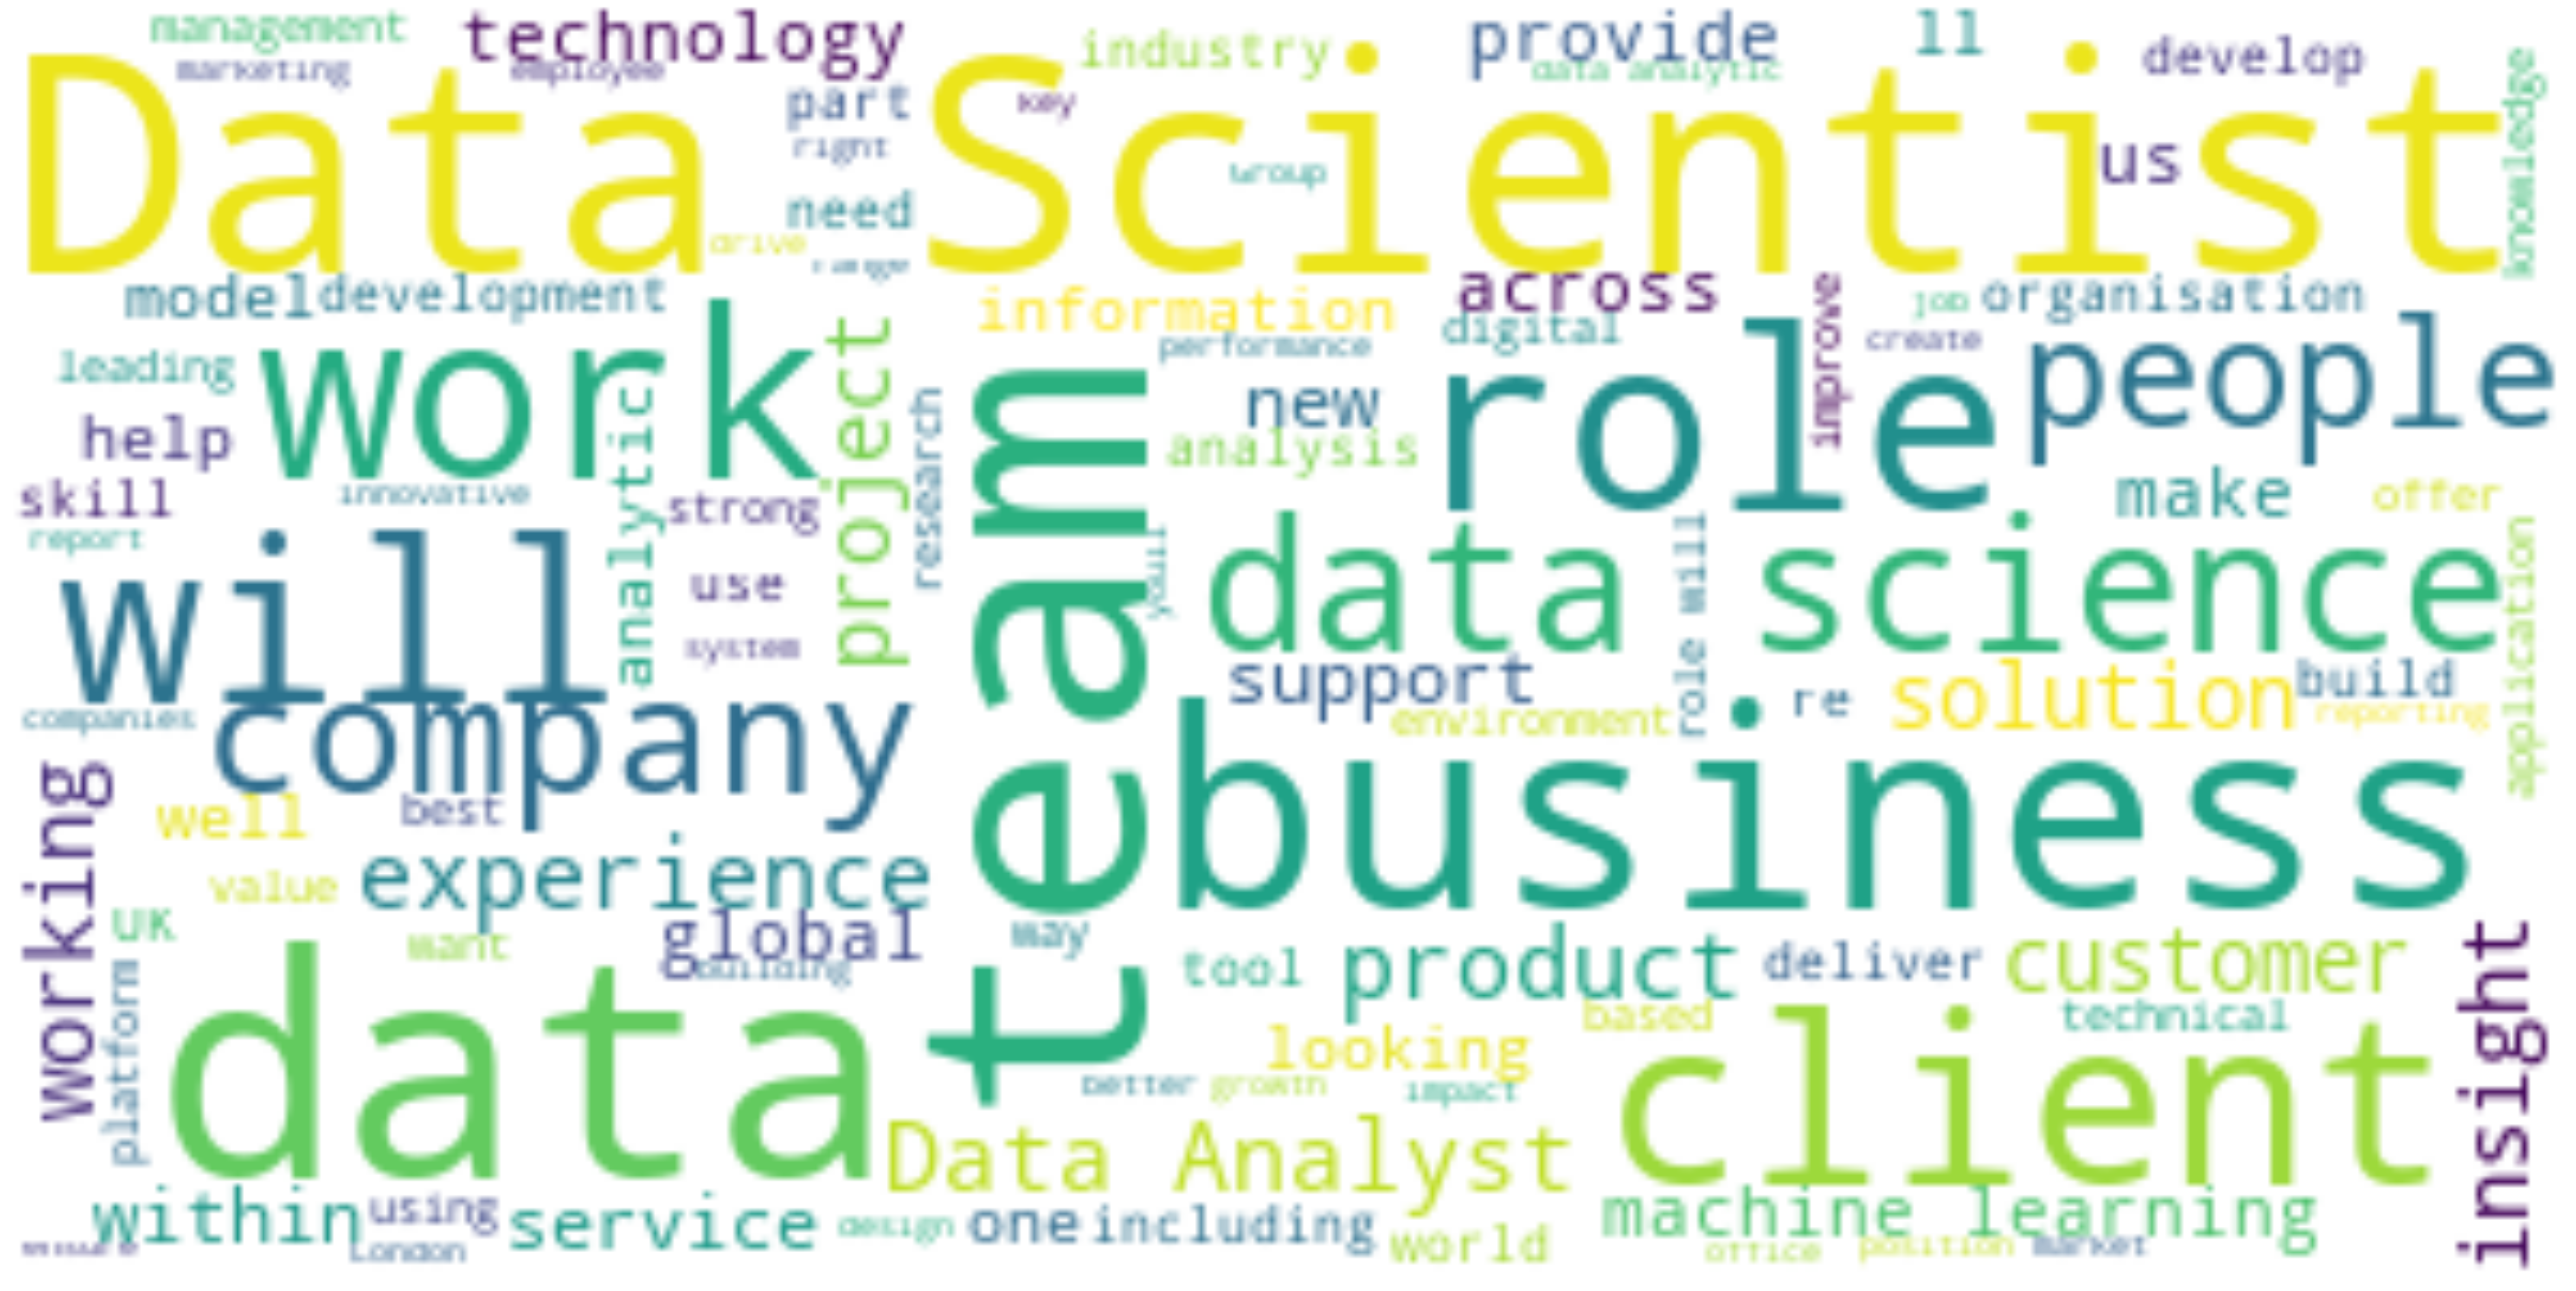

In [64]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# Start with one review:
text = " ".join(discription for discription in discription_df.description_punct)
# lower max_font_size, change the maximum number of word and lighten the background:
stopwords = set(STOPWORDS)
# stopwords.add(search_modifier)
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords= stopwords ,  background_color="white").generate(text)
wordcloud.to_file('N.png')
plt.figure(figsize=(100,50))
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# plt.savefig('wordcloud.png')

## Frequency Analysis

In [65]:
#download nltk attribute if needed
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [68]:
text = ' '.join(description for description in discription_df.description_punct)

In [69]:
text

'Data Scientist  Booking platform Saas       basic plus bens  London with some flexible working    The role this is a newly created role reporting to the BI Director the Data Scientist will help develop and build a datadriven culture throughout the company Technical Staffing Resources TSR are the inhouse agency and master vendor for KBR who are a leading global engineering construction and services company    KBR support the hydrocarbon and government services markets on six continents Serving their customers through diverse business units KBR offer challenging assignments on some of the worlds largest and most complex projects    JOB DESCRIPTION   Skills and Experience   Core Responsibilities and Duties Technical delivery Must be able to deliver on a technical level You will be writing code produce reports and implement high quality algorithms which will be used to determine critical business and warehouse functions and forward planning  Spot patterns within a large volume of data pro

In [70]:
# tokenization
filtered_text = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

In [71]:
from nltk.corpus import stopwords
# stopwords
filtered_text = [word for word in filtered_text if word not in stopwords.words('english')]

In [72]:
# punctuation
filtered_text = [''.join(c for c in s if c not in string.punctuation) for s in filtered_text]
filtered_text = [s for s in filtered_text if s]

In [73]:
# lowercase
filtered_text = [word.lower() for word in filtered_text]

In [74]:
# Word Stemming
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
filtered_text_stem = [stemmer.stem(t) for t in filtered_text]

In [75]:
# Lemmatization
lemmatizer = nltk.WordNetLemmatizer()

filtered_text_lem = [lemmatizer.lemmatize(t) for t in filtered_text]

In [76]:
# NLTK Frequency Distributions
#nltkText = [filtered_text_stem, filtered_text_lem]

fdist = nltk.FreqDist(filtered_text_lem)

fdistDF = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdistDF = fdistDF.rename(columns={'index':'word', 0:'count'})
fdistDF = fdistDF.sort_values(by='count', ascending=False)
print('-----------------head words-----------------')
print(fdistDF.head(10).reset_index(drop=True))
print('-----------------tail words-----------------')
print(fdistDF.tail(10).reset_index(drop=True))

-----------------head words-----------------
         word  count
0        data   3149
1        team   1188
2          we   1058
3    business    922
4        work    808
5         the    726
6   scientist    712
7        role    668
8         you    601
9  experience    547
-----------------tail words-----------------
              word  count
0          packard      1
1              isl      1
2              tel      1
3         synopsis      1
4           prepay      1
5      equilvilant      1
6    usingcreating      1
7  creatingrunning      1
8     intermediary      1
9     contractfull      1


## Analyze document words with data science job descripiton database
To indentify what skills are specific for this job vacancy in particulair we have to create a data science job description database. Using this database we can identify what is specific about this job with the steps below.

Building a Term-Document Matrix
Use scikit-learn's TfidfVectorizer class to construct a term-document matrix containing the TF-IDF score for each word in each document in the data science job description database. In essence, the rows of this sparse matrix correspond to documents in the corpus, the columns represent each word in the vocabulary of the corpus, and each cell contains the TF-IDF value for a given word in a given document.

TF-IDF Scores
Now that we've built the term-document matrix, we can explore its contents:

In [190]:
from random import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# rand_indexs = np.random.randint(1,len(discription_df),1)
rand_indexs = np.random.randint(1,len(discription_df),1)
text = " ".join(discription_df["description_punct"][rand_indexs].tolist())
print(text)

tfidf = TfidfVectorizer(stop_words='english', analyzer='word', lowercase=True)
content = text.split()
tfidf_vector = tfidf.fit_transform(content)

feature_names = tfidf.get_feature_names()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

tdm= pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print ('TDM contains ' + str(len(feature_names)) + ' terms and ' + str(tdm.shape[0]) + ' documents')

print ('first term: ' + feature_names[0])
print ('last term: ' + feature_names[len(feature_names) - 1])

for i in range(0, 4):
    print ('random term: ' + feature_names[randint(1,len(feature_names) - 2)])

You will to lead an advanced data analytics and performance team to deliver insights to the business globally You will manage a hub of data scientists tasked with managing consumer insight business analysis and data science projects as well as inmarket data science teams with a focus on business performance analysis and data science Your team consists of a range of specialisms supporting functions such as Finance Commercial Strategy Operations amongst others    You will provide thought leadership on advanced analytics as well as coordinating the pooling of insight across geographically dispersed teams Ensuring that key business stakeholders are supported with rapid insight and robust analytical support while simultaneously managing the delivery of longer term projects and larger pieces of work the role will be adept at managing competing priorities and multiple stakeholders As a coach you will ensure team members  career paths are defined and we are ensuring skillsets are being develop

In [163]:
discription_df.columns

Index(['job_description', 'description_punct', 'discription_tokenized',
       'discription_nonstop', 'discription_stemmed', 'discription_lemmatized'],
      dtype='object')

### Generating the Summary
That's all we'll need to produce a summary for any document in the corpus. In the example code below, we start by randomly selecting an article from the data science job description database. We iterate through the article, calculating a score for each sentence by summing the TF-IDF values for each word appearing in the sentence. We normalize the sentence scores by dividing by the number of tokens in the sentence (to avoid bias in favor of longer sentences). Then we sort the sentences by their scores, and return the highest-scoring sentences as our summary. The number of sentences returned corresponds to roughly 20% of the overall length of the article.

In [ ]:
from __future__ import division
import math

def tokenize_and_stem(sentence):
    filtered_text = [word for sent in nltk.sent_tokenize(sentence) for word in nltk.word_tokenize(sent)]
    stemmer = SnowballStemmer("english")
    filtered_text_stem = [stemmer.stem(t) for t in filtered_text]
    return filtered_text_stem
    
    
    
article_id = randint(0, tdm.shape[0] - 1)
article_text = discription_df.iloc[article_id]
print(article_text)

sent_scores = []
for sentence in nltk.sent_tokenize(article_text):
    score = 0
    sent_tokens = tokenize_and_stem(sentence)
    for token in (t for t in sent_tokens if t in feature_names):
        score += tdm[article_id, feature_names.index(token)]
    sent_scores.append((score / len(sent_tokens), sentence))

summary_length = int(math.ceil(len(sent_scores) / 5))
sent_scores.sort(key=lambda sent: sent[0], reverse=True)

print ('*** SUMMARY ***')
for summary_sentence in sent_scores[:summary_length]:
    print (summary_sentence[1])

print ('\n*** ORIGINAL ***')
print (article_text)